In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import numpy as np
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_regression
import matplotlib.patches as patches
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
df = pd.read_pickle('full_df_static_2-18-23.pkl')
df1= df.drop(df.columns[[0,1,2]], axis=1)

j=[]
for i in range(1,112):
    j.append(i)
    
df2= df1.drop(df1.columns[[j]], axis=1)

df2= df2.drop(df2.columns[[2,3,4,5,6,9]], axis=1)

j=[]
for i in range(4,72):
    j.append(i)
    
df2= df2.drop(df2.columns[[j]], axis=1)
df2= df2.drop(df2.columns[[5,8]], axis=1)
df2= df2.drop(df2.columns[[8,9,10,11,12,13,14,15,16]], axis=1)

df2.rename(columns={'pm1_palas':'$\mathrm{PM_{1}}$', 'pda': 'Average Pupil Diameter', 'pup_dis': 'Pupil Distance','pd_diff':'Difference in Pupil Diameter', 'Resp.':'Respiration rate','SpO2':'$\mathrm{SpO_2}$','Temp.': 'Skin Temperature','HR': 'Heart Rate' }, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:5069: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [3]:
bands = {'delta': (1, 3),
         'theta': (4, 7),
         'alpha': (8, 12),
         'beta': (13, 25),
         'gamma': (26, 45)}

ch_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7','F8', 'T8',
        'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6',
        'CP5', 'CP6', 'FT9', 'FT10', 'FCz', 'AFz', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2',
        'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6',
        'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'CPz', 'POz', 'TP10']

eeg_cols = [j+"-"+i+' ($\mathrm{V^2}$/Hz)' for i in bands.keys() for j in ch_names]

non_eeg_cols=['$\mathrm{PM_{1} (\mu g/m^3)}$', 'Average Pupil Diameter (mm)', 'Pupil Distance (mm)','Difference in Pupil Diameter (mm)', 'Respiration rate (brpm)','$\mathrm{SpO_2}$ (%)', 'Heart Rate (bpm)', 'Skin Temperature ($\mathrm{^o C})$']

new_columns=non_eeg_cols+eeg_cols

df2.columns = new_columns
df7=df2

df7['$\mathrm{SpO_2}$ (%)']=df7['$\mathrm{SpO_2}$ (%)']*1000000 ## change the SpO2 to percentage

j=[]
for i in range(8,323):
    j.append(i)
df7 = df7.drop(df7.columns[j], axis=1)

df7 = df7.drop(df7.columns[[1,2,3]], axis=1)
df7


,$\mathrm{PM_{1} (\mu g/m^3)}$,Respiration rate (brpm),$\mathrm{SpO_2}$ (%),Heart Rate (bpm),Skin Temperature ($\mathrm{^o C})$
dateTime,,,,,
2021-10-21 22:37:57,0.60,29.114576,100.0,87.0,31.2500
2021-10-21 22:37:59,0.61,28.610229,99.0,90.0,31.1875
2021-10-21 22:38:00,0.61,29.068727,99.0,90.0,31.2500
2021-10-21 22:38:01,0.59,28.610229,99.0,92.0,31.1250
2021-10-21 22:38:03,0.60,29.068727,99.0,93.0,31.3125
...,...,...,...,...,...
2022-02-09 22:59:09,0.52,37.367526,100.0,101.0,30.8750
2022-02-09 22:59:14,0.54,35.120890,100.0,103.0,30.8750
2022-02-09 22:59:17,0.54,36.312982,100.0,98.0,30.8750


In [4]:
## Lets create a Train-Test set and transform the data.

features=df7.drop('$\mathrm{PM_{1} (\mu g/m^3)}$',axis=1)
target=df7['$\mathrm{PM_{1} (\mu g/m^3)}$'].copy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features, target, test_size=0.20)



In [5]:
## lets optimize the hyperparameters

param_grid=[{'n_estimators':[40,50,60], 'max_features':[2,4,5]}, 
                                             {'bootstrap':[False],'n_estimators':[90,110,120],'max_features':[3,5]},]
        

In [6]:
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=3,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\job

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 5],
                          'n_estimators': [40, 50, 60]},
                         {'bootstrap': [False], 'max_features': [3, 5],
                          'n_estimators': [90, 110, 120]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [7]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=60)

In [8]:
## lets now select the model. This will be used later
final_model=grid_search.best_estimator_

In [9]:
## Lets now train the model using Random Forest Regressor 

final_model.fit(X_train,y_train)

train_prediction_RF=final_model.predict(X_train)
RF_mse=mean_squared_error(y_train,train_prediction_RF)
RF_rmse=np.sqrt(RF_mse)
RF_rmse_train=RF_rmse

print('The train RMSE for PM1 is:::', '%.2f' % RF_rmse)


The train RMSE for PM1 is::: 0.03


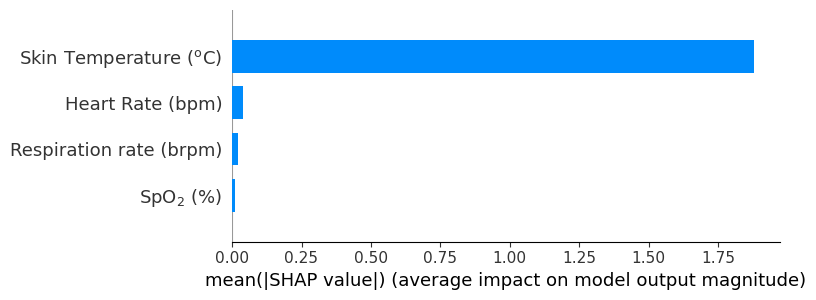

In [10]:
## Lets now use SHAP values for feature importance

import shap

shap_values = shap.TreeExplainer(final_model).shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=9)


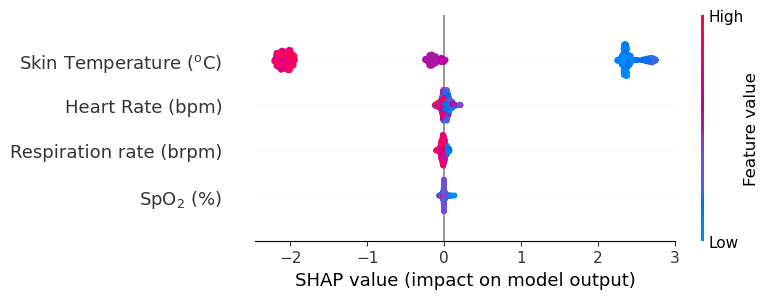

In [11]:
shap.summary_plot(shap_values, X_train,max_display=9)


In [12]:
## lets get the top 9 features as selected by SHAP values

shap_names=X_train.columns[np.argsort(np.abs(shap_values).mean(0))]  ## gives entire names in ascending order

## lets reverse the list of the names
shap_descending=[]
for i in reversed(shap_names):
    shap_descending.append(i)

## lets get the top 9 features as selected by SHAP values
    
names_rev_shap=[]
for i in range(0,4):
    names_rev_shap.append(shap_descending[i])

Text(0.5, 1.0, "Pearson's Correlation Coefficient Plot")

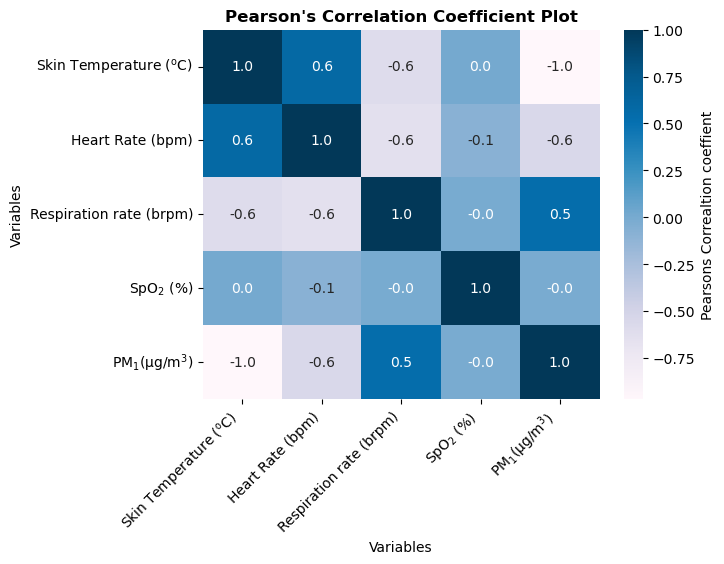

In [13]:
## Now that we have the list of top 10 features, lets plot the correlation plot

names_rev_shap.append('$\mathrm{PM_{1} (\mu g/m^3)}$') ## add the target CO2 for the correlation matrix
corr=df7[names_rev_shap].corr()


import seaborn as sns
import matplotlib.pyplot as plt


ax=sns.heatmap(corr,cmap="PuBu",annot=True,fmt=".1f",cbar_kws={'label': 'Pearsons Correaltion coeffient'})

plt.xticks(rotation=45,horizontalalignment='right')

ax.set(xlabel="Variables",ylabel="Variables")

plt.title("Pearson's Correlation Coefficient Plot",fontweight='bold')

In [14]:
## Now lets plot the mutual information

from sklearn.feature_selection import mutual_info_regression

## Lets calucalute the mutual information against each of the top 10 features

mf_mat=[]
for i in range(0,5):
    for j in range(0,5):
        dd=df7[names_rev_shap[i]]  ## extracting the labels
        mm=df7[names_rev_shap[j]]  ## extracting the labels

        kk=dd.to_numpy().reshape((-1,1)) ## reshape the array to (2317,1)
        
        vv=mm.to_numpy().reshape((-1,1))
        pp=vv.reshape(1383,)             ## reshape the array to (2317,) as required by the mutual_info_regression function
        
        
        mi=mutual_info_regression(kk,pp)
        mf_mat.append(mi)

mf_mat_arr=np.asarray(mf_mat)  ## transform the elements from a list to array

# reshape array 

reshaped_array = mf_mat_arr.reshape(5, 5).T 

Text(0.5, 1.0, 'Mutual Information Plot')

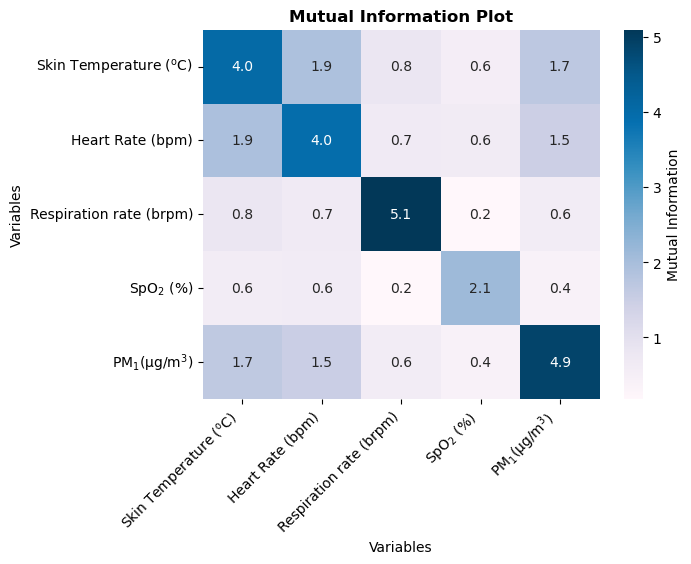

In [15]:
mf_df=pd.DataFrame(reshaped_array,columns=[names_rev_shap],index=[names_rev_shap]) ## convert into a pandas DataFrame


ax=sns.heatmap(mf_df,cmap="PuBu",annot=True,fmt='.1f',cbar_kws={'label':'Mutual Information'}) ## Now lets plot the mutual information heatmap

plt.xticks(rotation=45,horizontalalignment='right')

ax.set(title="Mutual Information Plot",xlabel="Variables",ylabel="Variables")

plt.title("Mutual Information Plot",fontweight='bold')

In [16]:
## The test prediction

test_prediction_RF=final_model.predict(X_test)

RF_mse=mean_squared_error(y_test,test_prediction_RF)
RF_rmse=np.sqrt(RF_mse)
RF_rmse_test=RF_rmse

print('The test RMSE for PM1 is:::', '%.2f' % RF_rmse)

The test RMSE for PM1 is::: 0.09


In [17]:
### The correlation values

from scipy.stats import pearsonr

## The train correlation
train_r_sq=(pearsonr(y_train,train_prediction_RF)[0])**2
correlation_train=int(train_r_sq*100)/100 ## display only two digits without rounding
print(correlation_train)

## The test correlation
test_r_sq=(pearsonr(y_test,test_prediction_RF)[0])**2
correlation_test=int(test_r_sq*100)/100 ## display only two digits without rounding
print(correlation_test)

0.99
0.99


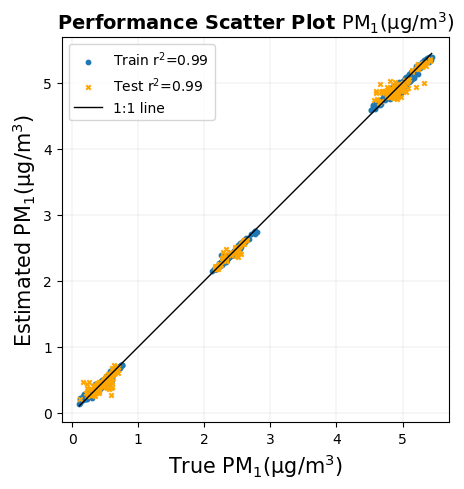

In [18]:
## Lets plot the scatter plot

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['mathtext.default']='regular'

plt.figure(figsize=(5,5))
plt.scatter(y_train, train_prediction_RF,s=10,c='C0',label="Train $r^2$={}".format(correlation_train))
plt.scatter(y_test, test_prediction_RF,marker='x',s=10,c='orange',label='Test $r^2$={}'.format(correlation_test))


p1 = max(max(train_prediction_RF), max(y_train))
p2 = min(min(train_prediction_RF), min(y_train))
plt.plot([p1, p2], [p1, p2], 'black',label='1:1 line',linewidth=1)
plt.xlabel('True $\mathrm{PM_{1} (\mu g/m^3)}$', fontsize=15)
plt.ylabel('Estimated $\mathrm{PM_{1} (\mu g/m^3)}$', fontsize=15)
plt.axis('equal')
plt.title("Performance Scatter Plot $\mathrm{PM_{1} (\mu g/m^3)}$", fontsize=14,fontweight="bold")
plt.legend()
plt.grid(axis='both',linewidth=0.15)
plt.show()

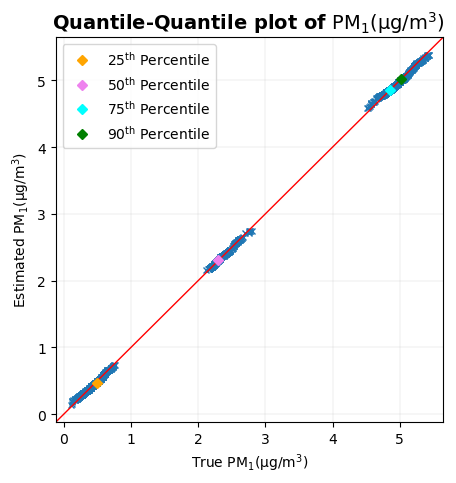

In [19]:
## Lets plot the quantile quantile 

all_preds=np.concatenate((train_prediction_RF,test_prediction_RF)) ## the list of all predictions and target values
preds=np.sort(all_preds)
tars=target.sort_values()

import statsmodels.api as sm
import scipy.stats as stats

plt.rc("figure", figsize=(5,5)) ## to make same figure size in statsmodels.api

pp_x = sm.ProbPlot(preds, fit=False)
pp_y = sm.ProbPlot(tars, fit=False)
qq = pp_x.qqplot(xlabel='True $\mathrm{PM_{1} (\mu g/m^3)}$',ylabel='Estimated $\mathrm{PM_{1} (\mu g/m^3)}$',marker='x',markersize=4,other=pp_y)

sm.qqline(qq.axes[0], line='45', fmt='r',linewidth=1)
                                 
tars_25=np.percentile(tars,25)  ## for the percentiles                                                        
tars_50=np.percentile(tars,50)
tars_75=np.percentile(tars,75)
tars_90=np.percentile(tars,90)


preds_25=np.percentile(preds,25)
preds_50=np.percentile(preds,50)
preds_75=np.percentile(preds,75)  
preds_90=np.percentile(tars,90)  ## end of percentiles

plt.plot(tars_25,preds_25,marker="D",markersize=5,color="orange",linestyle ='None',label="$\mathrm{25^{th}}$ Percentile")
plt.plot(tars_50,preds_50,marker="D",markersize=5,color="violet",linestyle ='None',label="$\mathrm{50^{th}}$ Percentile")
plt.plot(tars_75,preds_75,marker="D",markersize=5,color="Cyan",linestyle ='None',label="$\mathrm{75^{th}}$ Percentile")
plt.plot(tars_90,preds_90,marker="D",markersize=5,color="Green",linestyle ='None',label="$\mathrm{90^{th}}$ Percentile")


plt.grid(axis='both',linewidth=0.15)

plt. title('Quantile-Quantile plot of $\mathrm{PM_{1} (\mu g/m^3)}$ ',fontsize=14,fontweight="bold")

plt.legend()
plt.show()


## Note that since the number of samples is the same, sorting the values in ascending or descending order and then...
## plotting a scatter plot will also do the same thing as the quantiles are located in same point for distribution..
## of same size.

In [20]:
## Lets now plot the Time series plot. 

splitted_original_data=pd.concat([y_train,y_test]) ## concatenate the splitted original target variable i.e. PM2.5
splitted_original_data

predicted_splited=np.concatenate((train_prediction_RF,test_prediction_RF),axis=None) ## concatenate the predicted....
predicted_splited ## train and test numpy arrays

splitted_df=splitted_original_data.to_frame() ##convert splitted original data PM2.5 from pandas series to 
splitted_df    

splitted_df['predicted_splited']=predicted_splited.tolist() ## Now concatenate the PM2.5 dataframe and the
splitted_df                                                         ## the numpy array

sorted_df=splitted_df.sort_values(by='dateTime') ## sort according to timestamp
sorted_df 

df_reset=sorted_df.reset_index() ##reset the index and start from zero as the hh:mm:ss is not real time
df_reset 

df_indexed=df_reset.drop(columns="dateTime") 
df_indexed 

df_timeseries=df_indexed.rename(columns={'$\mathrm{PM_{1} (\mu g/m^3)}$':'True $\mathrm{PM_{1}}$','predicted_splited':'Estimated $\mathrm{PM_{1}}$'})
df_timeseries 

,True $\mathrm{PM_{1}}$,Estimated $\mathrm{PM_{1}}$
0,0.60,0.597500
1,0.61,0.607667
2,0.61,0.606167
3,0.59,0.545500
4,0.60,0.600167
...,...,...
1378,0.52,0.478167
1379,0.54,0.466333
1380,0.54,0.489667
1381,0.53,0.485167


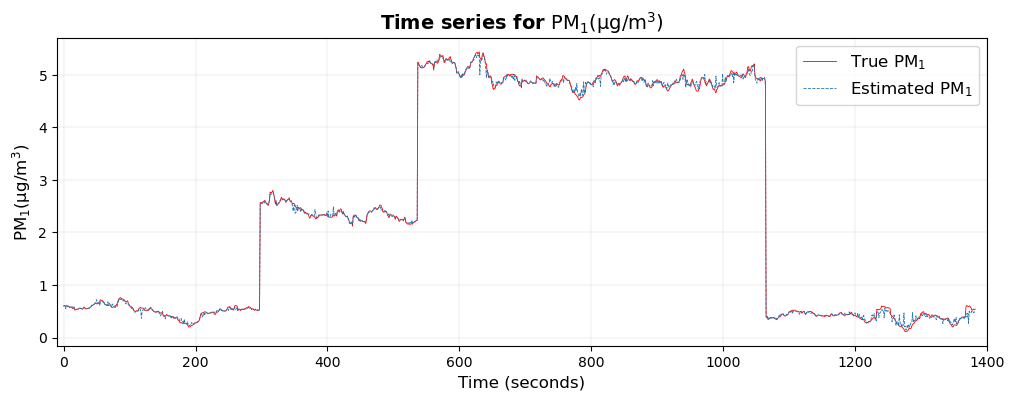

In [21]:
##Lets now plot the time series

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df_timeseries['True $\mathrm{PM_{1}}$'],label='True $\mathrm{PM_{1}}$',linewidth=0.6,color='red')
ax.plot(df_timeseries['Estimated $\mathrm{PM_{1}}$'],label='Estimated $\mathrm{PM_{1}}$',linewidth=0.6,linestyle='--')

plt.xlim([-10,1400])

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('$\mathrm{PM_{1} (\mu g/m^3)}$',fontsize=12)
plt.title('Time series for $\mathrm{PM_{1} (\mu g/m^3)}$',fontsize=14,fontweight="bold")
plt.legend(fontsize=12)
plt.grid(axis='both',linewidth=0.15)
plt.show()

In [22]:
## lets now extract rows from the timeseries so that there is discontinuity in the trials, as the red lines seen are...
## continous

timeseries_1=df_timeseries.iloc[0:297,:]
timeseries_2=df_timeseries.iloc[298:536,:]
timeseries_3=df_timeseries.iloc[537:1064,:]
timeseries_4=df_timeseries.iloc[1065:1382,:]

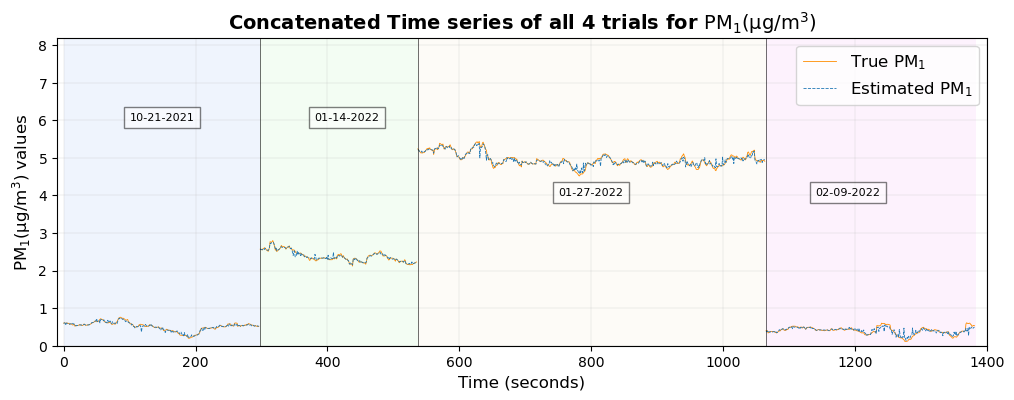

In [23]:
fig, ax = plt.subplots(figsize=(12,4))

import matplotlib.patches as patches

ax.plot(timeseries_1['True $\mathrm{PM_{1}}$'],label='True $\mathrm{PM_{1}}$',linewidth=0.6,color='darkorange')
ax.plot(timeseries_1['Estimated $\mathrm{PM_{1}}$'],label='Estimated $\mathrm{PM_{1}}$',linewidth=0.6,linestyle='--',color='C0')

ax.plot(timeseries_2['True $\mathrm{PM_{1}}$'],linewidth=0.6,color='darkorange')
ax.plot(timeseries_2['Estimated $\mathrm{PM_{1}}$'],linewidth=0.6,linestyle='--',color='C0')

ax.plot(timeseries_3['True $\mathrm{PM_{1}}$'],linewidth=0.6,color='darkorange')
ax.plot(timeseries_3['Estimated $\mathrm{PM_{1}}$'],linewidth=0.6,linestyle='--',color='C0')

ax.plot(timeseries_4['True $\mathrm{PM_{1}}$'],linewidth=0.6,color='darkorange')
ax.plot(timeseries_4['Estimated $\mathrm{PM_{1}}$'],linewidth=0.6,linestyle='--',color='C0')


plt.text(100,6, '10-21-2021', fontsize = 8, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(380,6, '01-14-2022', fontsize = 8, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(750,4, '01-27-2022', fontsize = 8, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(1140,4, '02-09-2022', fontsize = 8, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

rect1 = patches.Rectangle((0, 0), 298, 8.2, fc="CornflowerBlue",alpha=0.1)
ax.add_patch(rect1)

rect2 = patches.Rectangle((298, 0), 239, 8.2, fc="lightgreen",alpha=0.1)
ax.add_patch(rect2)

rect3 = patches.Rectangle((537, 0), 528, 8.2, fc="wheat",alpha=0.1)
ax.add_patch(rect3)

rect4 = patches.Rectangle((1065, 0), 318, 8.2, fc="violet",alpha=0.1)
ax.add_patch(rect4)


plt.xlim([-10,1400])
plt.ylim([0,8.2])


plt.axvline(x=298, color='k', linewidth=0.4)
plt.axvline(x=537, color='k', linewidth=0.4)
plt.axvline(x=1065, color='k', linewidth=0.4)


plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('$\mathrm{PM_{1} (\mu g/m^3)}$ values',fontsize=12)
plt.title('Concatenated Time series of all 4 trials for $\mathrm{PM_{1} (\mu g/m^3)}$',fontsize=14,fontweight="bold")
plt.legend(fontsize=12)
plt.grid(axis='both',linewidth=0.15)
plt.show()